<a href="https://colab.research.google.com/github/CharlesPrado23/Notebooks/blob/main/Semana9/Collaborative_aula(NearestNeighbors_ItemBased).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Collaborative Filtering

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

-   Create recommendation system based on collaborative filtering


Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore recommendation systems based on Collaborative Filtering and implement simple version of one using Python and the Pandas library.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Acquiring the Data</a></li>
        <li><a href="#ref2">Preprocessing</a></li>
        <li><a href="#ref3">Collaborative Filtering</a></li>
    </ol>
</div>
<br>
<hr>


<a id="ref1"></a>

# Acquiring the Data


To acquire and extract the data, simply run the following Bash scripts:  
Dataset acquired from [GroupLens](http://grouplens.org/datasets/movielens?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Lets download the dataset. To download the data, we will use **`!wget`** to download it from IBM Object Storage.  
**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


In [1]:
!wget -O moviedataset.zip https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/data/moviedataset.zip
print('unziping ...')
!unzip -o -j moviedataset.zip 

--2021-04-11 18:56:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/data/moviedataset.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160301210 (153M) [application/zip]
Saving to: ‘moviedataset.zip’

moviedataset.zip    100%[===================>] 152.88M  41.3MB/s    in 3.7s    

2021-04-11 18:57:02 (41.3 MB/s) - ‘moviedataset.zip’ saved [160301210/160301210]

unziping ...
Archive:  moviedataset.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: README.txt              
  inflating: tags.csv        

Now you're ready to start working with the data!


<hr>

<a id="ref2"></a>

# Preprocessing


First, let's get all of the imports out of the way:


In [1]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now let's read each file into their Dataframes:


In [4]:
#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('D:/Git/Arquivos/movies.csv',usecols=['movieId','title'])
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('D:/Git/Arquivos/ratings.csv',usecols=['userId','movieId','rating'])

Let's also take a peek at how each of them are organized:


In [5]:
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


<br>


Next, let's look at the ratings dataframe.


In [6]:
ratings_df_ = ratings_df.iloc[1:2000000, :]
ratings_df_

,userId,movieId,rating
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0
5,2,112552,5.0
...,...,...,...
1999995,21530,541,3.5
1999996,21530,551,4.0
1999997,21530,553,4.0
1999998,21530,586,1.5


<hr>

<a id="ref3"></a>

# Collaborative Filtering


Now, time to start our work on recommendation systems. 

The first technique we're going to take a look at is called **Collaborative Filtering**, which is also known as **User-User Filtering**. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the **Pearson Correlation Function**.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/User_Item.png" width=800px>

The process for creating a User Based recommendation system is as follows:

-   Select a user with the movies the user has watched
-   Based on his rating to movies, find the top X neighbours 
-   Get the watched movie record of the user for each neighbour.
-   Calculate a similarity score using some formula
-   Recommend the items with the highest score

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .


In [8]:
movies_users = ratings_df_.pivot_table(index = 'movieId', columns='userId',values='rating')
movies_users

userId,1,2,3,4,5,6,7,8,9,10,...,21521,21522,21523,21524,21525,21526,21527,21528,21529,21530
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
movies_users = movies_users.fillna(0)
movies_users

userId,1,2,3,4,5,6,7,8,9,10,...,21521,21522,21523,21524,21525,21526,21527,21528,21529,21530
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
movies_users.index[0]

1

In [11]:
X = movies_users.values
X

array([[0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

# NearestNeighbors
# Item-based

In [13]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(metric = 'cosine', algorithm='brute', n_neighbors=30).fit(X)

In [14]:
!pip install fuzzywuzzy
from fuzzywuzzy import process
idx = process.extractOne('Star Wars',movies_df['title'])[2]
idx

C:\Users\leodr\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


257

In [15]:
idx

257

In [16]:
X[idx]

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
distances, indices = nbrs.kneighbors(X[idx].reshape(1,-1),n_neighbors=30)

In [18]:
distances

array([[0.        , 0.65748352, 0.72701657, 0.75050514, 0.76589887,
        0.76955754, 0.77180163, 0.77507263, 0.78805406, 0.78859674,
        0.78893344, 0.79317384, 0.79340141, 0.79438022, 0.79515763,
        0.79570772, 0.79927718, 0.80029175, 0.80052894, 0.80286958,
        0.80354663, 0.80356768, 0.8041328 , 0.8048105 , 0.80495012,
        0.80504469, 0.8070745 , 0.8078501 , 0.80830841, 0.81006055]])

In [19]:
for k in indices: 
  print(movies_df['title'][k].where(k!=idx))

257                                                  NaN
524                                    Scout, The (1994)
256                                 Kiss of Death (1995)
309                       Stuart Saves His Family (1995)
33                                           Babe (1995)
47                                     Pocahontas (1995)
585                              Tough and Deadly (1995)
584                            Dances with Wolves (1990)
586                                        Batman (1989)
217                                     Cure, The (1995)
59                    Indian in the Cupboard, The (1995)
38                                       Clueless (1995)
16                          Sense and Sensibility (1995)
470                           In the Line of Fire (1993)
578    I Don't Want to Talk About It (De eso no se ha...
276                                     My Family (1995)
358                              Jungle Book, The (1994)
272                            

# Matrix Factorization

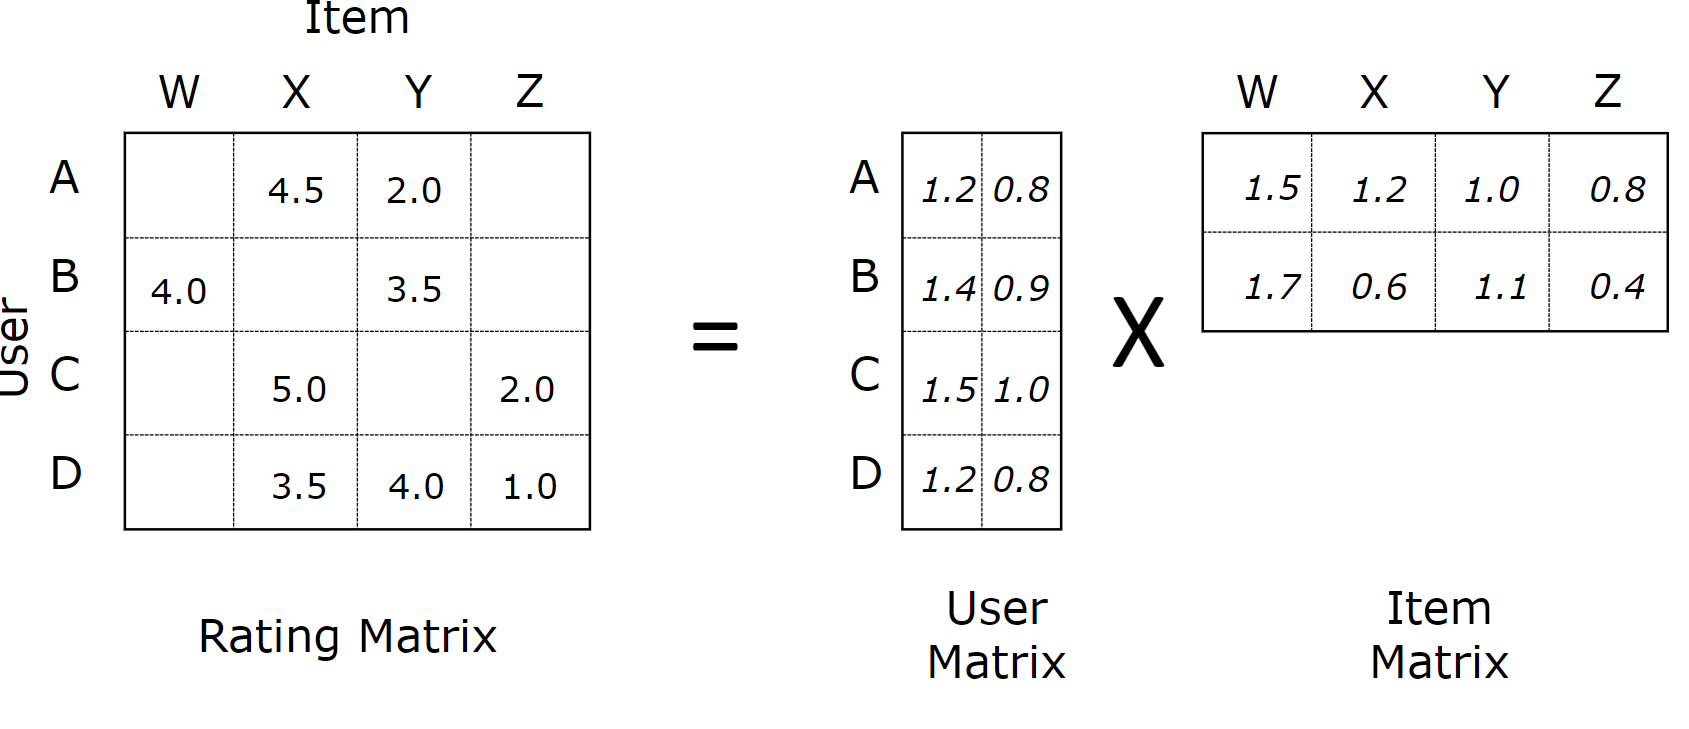